# 01. - Case Study IH Logistic Regression Binary Classification


### What's a logistic regression?

In just five words: logistic regression is a classifier.

Logistic regression is a statistical analysis method used to predict a data value based on prior observations of a dataset. Logistic regression has become an important tool in machine learning. The approach allows an algorithm being used in a machine learning application to classify incoming data based on historical data. As more relevant data comes in, the algorithm should get better at predicting classifications within data sets. Logistic regression can also play a role in data preparation activities by allowing datasets to be put into specifically predefined buckets during the ETL process in order to stage the information for analysis.

A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables. For example, a logistic regression could be used to predict whether a picture is a cat or a dog. 

![blr](images/blr.jpeg)

The resulting analytical model can take into consideration multiple input criteria. In the case of pictures, the model could consider factors such as the pixels. Based on historical data about earlier outcomes involving the same input criteria, it then scores new cases on their probability of falling into a particular outcome category.


Logistic regression is one of the most commonly used machine learning algorithms for binary classification problems, which are problems with two class values, including predictions such as “this or that,” “yes or no” and “A or B.”

The purpose of logistic regression is to estimate the probabilities of events, including determining a relationship between features and the probabilities of particular outcomes. Organizations can use insights from logistic regression outputs to enhance their business strategies so they can achieve their business goals, including reducing expenses or losses and increasing ROI in marketing campaigns, etc... In the next example we'll try to make predictions about customer churn.

### Customer Churn example

![churn](images/churn.png)

Let's imagine you are a data analyst at a telecom company. The management knows that the company has a very high customer churn rate and they want to make a customer churn predictive model, a tool able to estimate the customer churn probability. The idea is if we can get a probability for the customer churn, we can do something about it.

The churn rate is the rate at which your customers are canceling their subscriptions. It is the percentage of subscribers who are leaving the company.

So, **you are the choosen one for the job**. Your manager is asking you to build a logistic regression model for churn prediction. We need to obtain a churn probability for each one of our customers in order to retain them. 

![churn2](images/churn2.png)

**Our main target is to improve the customer fidelity**. For that we need first to build a prediction model and then estimate churn probabilities.

Let's do it.

First, we've to import the necessary libraries.

In [1]:
import pandas as pd                                # panel data, for handling dataframes
pd.set_option('display.max_columns', None)         # show all columns of the dataframe

import numpy as np                                 # numerical python, linear algebra library

import pylab as plt                                # plotting library
import seaborn as sns                              # plotting library
sns.set(style='white')                             # seaborn style

from sqlalchemy import create_engine               # connection engine for SQL server


from sklearn.linear_model import LogisticRegression            # logistic regression model            
from sklearn.preprocessing import StandardScaler               # standarized
from sklearn.preprocessing import LabelEncoder               
from sklearn.model_selection import train_test_split as tts    # split data into train and test sets


from sklearn.metrics import confusion_matrix as cm      # confusion matrix for evaluation
from sklearn.metrics import roc_curve as roc            # ROC curve for evaluation
from sklearn.metrics import roc_auc_score as auc        # area under ROC curve for evaluation

### Accesing data

We should have access to the company database. Let's make the connection to SQL server.

In [2]:
DB_LANG='mysql'             # database language

DRIVER='pymysql'            # database driver

USER='root'                 # user name

PASSWORD='password'         # user password

HOST='localhost'            # host SQL server

PORT='3306'                 # host port

SCHEMA='telcom'             # database schema name

In [3]:
connection_string=f'{DB_LANG}+{DRIVER}://{USER}:{PASSWORD}@{HOST}:{PORT}/{SCHEMA}'

        
engine=create_engine(connection_string)   # connection engine

**Watch Out:**

Now we are already connected to SQL server, `telcom` database. 

We need to remember SQL database structure. We have entities ans relationships among them. In order to extract aggregated data we need to understand the entities as much as the relationships themselves. There is no 

```
SELECT * FROM some_ideal_clean_and_pristine.table_that_you_think_exists
```

This kind of query needs some previous work. Sometimes it's a hard work in deed. But for the purpose of this lesson, let's imagine we have already done this job and we have that kind of query saved in our database.


We have a temporary table saved in our database with all the aggregated data we need for the target. Let's import just 10000 registers from it.



In [4]:
df=pd.read_sql('select * from temporary_table limit 10000', engine)   # read data from SQL

df.head()      # show first 5 rows

,id,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Gender,SeniorCitizen,Partner,Dependents,Tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TenureLevel
0,0,3000002,Yes,24.0,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No,Female,0,No,No,65,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),Very Loyal
1,1,3000010,Yes,16.99,10.0,17.0,0.0,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes,Male,0,No,Yes,53,DSL,Yes,Yes,No,Yes,No,No,One year,No,Credit card (automatic),Loyal
2,2,3000014,No,38.0,8.0,38.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes,Female,0,No,No,1,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,New
3,3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No,Female,0,Yes,Yes,35,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),Regular
4,4,3000026,Yes,17.14,0.0,17.0,0.0,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes,Female,0,No,No,32,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),Loyal


In [5]:
df.shape     # dataframe dimensions

(10000, 75)

### EDA

Now we make a exploratory data analysis. First of all, we need to check the quality of our data, are there null values?, are the data dtypes correct? Let's check it out.

In [6]:
df.info()     # dataframe information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 75 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         10000 non-null  int64 
 1   CustomerID                 10000 non-null  object
 2   Churn                      10000 non-null  object
 3   MonthlyRevenue             10000 non-null  object
 4   MonthlyMinutes             10000 non-null  object
 5   TotalRecurringCharge       10000 non-null  object
 6   DirectorAssistedCalls      10000 non-null  object
 7   OverageMinutes             10000 non-null  object
 8   RoamingCalls               10000 non-null  object
 9   PercChangeMinutes          10000 non-null  object
 10  PercChangeRevenues         10000 non-null  object
 11  DroppedCalls               10000 non-null  object
 12  BlockedCalls               10000 non-null  object
 13  UnansweredCalls            10000 non-null  object
 14  Custome

Seeing this, we realize that we have a problem. All data dtypes, except id dtype, are pandas object. This in fact means all columns are string data. This will be a problem when we'll want make some calculations on the data.

So we need to change the data dtypes in the dataframe. We'll change all dtypes to float, if we can. Go ahead.

In [7]:
def change_all_dtypes(df):   
    '''
    This function change all dtypes to float if it can.
    
    input param df:  dataframe to be change
    
    returns: clean dataframe
    '''
    
    for c in df.columns:
        try:
            df[c]=df[c].astype(float)
        except:
            continue
            
    return df

In [8]:
df=change_all_dtypes(df)             # changed dataframe

df.info(memory_usage='deep')         # memory_usage='deep' shows the full MB in RAM memory ocuppied by df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 75 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  float64
 1   CustomerID                 10000 non-null  float64
 2   Churn                      10000 non-null  object 
 3   MonthlyRevenue             10000 non-null  float64
 4   MonthlyMinutes             10000 non-null  float64
 5   TotalRecurringCharge       10000 non-null  float64
 6   DirectorAssistedCalls      10000 non-null  float64
 7   OverageMinutes             10000 non-null  float64
 8   RoamingCalls               10000 non-null  float64
 9   PercChangeMinutes          10000 non-null  float64
 10  PercChangeRevenues         10000 non-null  float64
 11  DroppedCalls               10000 non-null  float64
 12  BlockedCalls               10000 non-null  float64
 13  UnansweredCalls            10000 non-null  floa

Now we have a dataframe with no null data and with the dtypes transformed for making operations. Let's take a look to our target data, the **Churn** column in the dataframe, in order to check the distribution of the customers according to this factor.

In [9]:
df.Churn.value_counts()    #  Number of custumers by churn

No     7092
Yes    2908
Name: Churn, dtype: int64

In [10]:
df.Churn.value_counts()/len(df)  # Customer churn rate

No     0.7092
Yes    0.2908
Name: Churn, dtype: float64

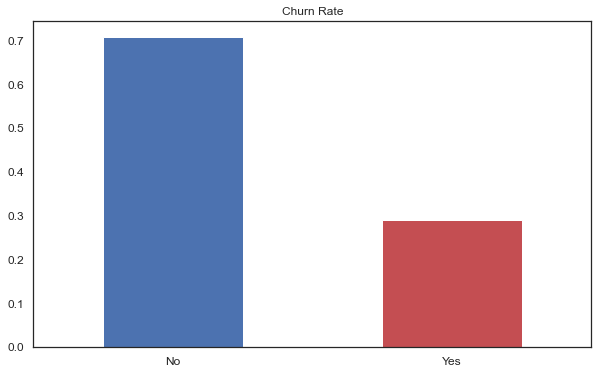

In [11]:
(df.Churn.value_counts()/len(df)).plot.bar(color=['b', 'r'],    # plot customer churn rate
                                           figsize=(10, 6),
                                           title='Churn Rate',
                                           rot=0,
                                           fontsize=12);

We have a churn rate of **29.08%**, in fact it is a very high churn rate.

### Data transformation


Now we need to understand which features are the most significant in order to predict the customer churn. 

We'll start with correlation matrix to take care about colinearity.

In [12]:
corr=df.corr()   # correlation matrix

corr

,id,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,SeniorCitizen,Tenure
id,1.000000,0.999989,-0.054447,-0.076248,-0.055196,-0.029955,-0.049254,0.002485,0.024224,0.019883,-0.014038,0.026210,-0.047074,0.016813,0.013765,-0.089451,-0.044451,-0.060135,-0.109806,-0.027413,0.007335,-0.021271,-0.082133,-0.878997,-0.024921,-0.022243,-0.275381,-0.277082,-0.037728,-0.047049,-0.032836,0.004911,-0.001065,-0.013649,-0.030694,-0.109121,-0.019922,0.006473
CustomerID,0.999989,1.000000,-0.054393,-0.076128,-0.055173,-0.029951,-0.049178,0.002424,0.024221,0.019878,-0.013906,0.026150,-0.046982,0.016844,0.013840,-0.089323,-0.044301,-0.060053,-0.109647,-0.027297,0.007384,-0.021217,-0.082079,-0.878382,-0.024985,-0.022304,-0.275222,-0.276932,-0.037676,-0.047122,-0.032853,0.004895,-0.000987,-0.013645,-0.030637,-0.108970,-0.019847,0.006500
MonthlyRevenue,-0.054447,-0.054393,1.000000,0.757586,0.689804,0.430077,0.728468,0.336420,-0.027768,-0.054468,0.475946,0.268412,0.474007,0.143790,0.227248,0.638275,0.554833,0.394984,0.657136,0.486824,0.480951,-0.006816,0.481727,0.075875,0.061315,0.037517,0.334547,0.343521,-0.308987,-0.109027,-0.102013,0.022755,0.030523,0.036004,-0.058993,0.071216,-0.016130,-0.009361
MonthlyMinutes,-0.076248,-0.076128,0.757586,1.000000,0.660816,0.424484,0.579046,0.147294,-0.045902,-0.057772,0.630422,0.338370,0.661055,0.321522,0.290019,0.852299,0.731466,0.563573,0.819152,0.750665,0.625960,0.001033,0.609510,0.110958,0.057936,0.018187,0.454793,0.465081,-0.391174,-0.145524,-0.134155,0.039908,0.038787,0.071506,-0.119261,0.124440,-0.007518,-0.004581
TotalRecurringCharge,-0.055196,-0.055173,0.689804,0.660816,1.000000,0.328843,0.220088,0.106051,-0.031173,-0.041784,0.418604,0.223384,0.418381,0.146803,0.190172,0.542615,0.490841,0.325112,0.597232,0.402450,0.415872,-0.007240,0.342113,0.086516,0.098299,0.072241,0.362704,0.370998,-0.327417,-0.106002,-0.107415,0.011517,0.024500,0.037327,-0.055275,0.098938,-0.016579,-0.001750
DirectorAssistedCalls,-0.029955,-0.029951,0.430077,0.424484,0.328843,1.000000,0.296456,0.116642,-0.029807,-0.049989,0.304642,0.156921,0.333786,0.068569,0.142990,0.295574,0.311200,0.173085,0.403176,0.271847,0.297504,0.001224,0.378594,0.040612,0.026468,0.011382,0.222081,0.207852,-0.146637,-0.060699,-0.057526,0.019969,0.031529,0.000334,-0.001753,0.036607,-0.014925,-0.000552
OverageMinutes,-0.049254,-0.049178,0.728468,0.579046,0.220088,0.296456,1.000000,0.052593,-0.020956,-0.034827,0.343399,0.215599,0.366302,0.083891,0.164815,0.519736,0.430387,0.349326,0.538559,0.374311,0.360448,-0.004545,0.553910,0.069489,0.026341,0.017345,0.184190,0.197113,-0.154912,-0.065580,-0.055456,0.021780,0.018053,0.027597,-0.033334,0.045420,-0.010264,-0.018499
RoamingCalls,0.002485,0.002424,0.336420,0.147294,0.106051,0.116642,0.052593,1.000000,-0.077601,-0.073063,0.106214,0.076769,0.054438,0.005963,0.044927,0.057843,0.082528,0.044482,0.077739,0.054515,0.117802,-0.001942,0.037727,-0.008084,0.010447,0.010762,0.051091,0.051944,-0.044879,-0.002008,0.002194,-0.001364,0.002206,-0.006416,-0.000903,0.005490,-0.003467,0.010775
PercChangeMinutes,0.024224,0.024221,-0.027768,-0.045902,-0.031173,-0.029807,-0.020956,-0.077601,1.000000,0.640456,-0.067204,-0.037103,-0.068549,-0.003535,0.019822,-0.083325,-0.054383,-0.110997,-0.113991,-0.069644,-0.067999,-0.003804,-0.149841,-0.034664,-0.015836,-0.017500,-0.035810,-0.028932,-0.002192,0.038873,0.001883,-0.017205,-0.015949,0.022061,0.031821,-0.020542,-0.016302,-0.011381
PercChangeRevenues,0.019883,0.019878,-0.054468,-0.057772,-0.04178

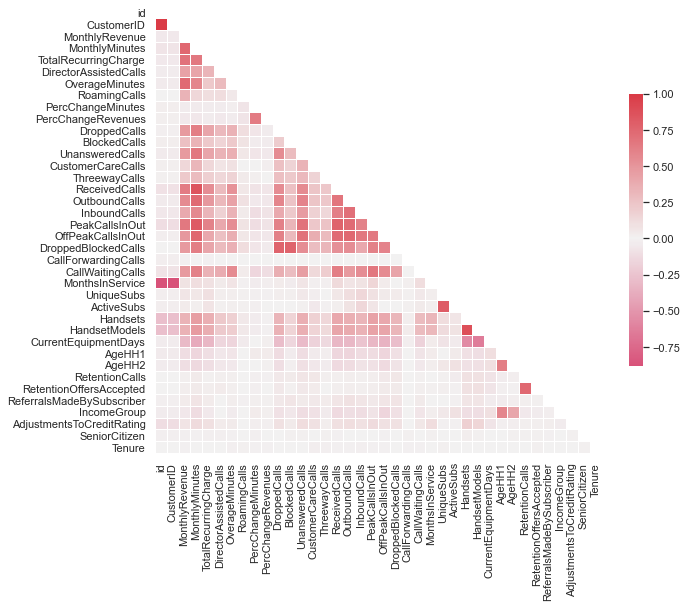

In [13]:
fig, ax=plt.subplots(figsize=(10,10))


mask=np.triu(np.ones_like(corr, dtype=bool))           # mask for superior triangular matrix


color_map=sns.diverging_palette(0, 10, as_cmap=True)   # color palette


# correlation heatmap
sns.heatmap(corr,                       # data
            mask=mask,                  # white mask
            cmap=color_map,             # color
            vmax=1,                     # vertical edge
            center=0,                   # plot center
            square=True,                # data square representation
            linewidth=.5,               # linewidth
            cbar_kws={'shrink': .5},    # lateral bar legend
            ax=ax                       # axes for plot size
           );

We can see a few columns with high correlation. We are going to drop that columns, this avoid colinearity, meaning avoid introduce noise in our data.

Our criteria will be $0.85 < \rho $, if this happends we'll drop the column.

In [14]:
columns_to_drop=[]                   

for c in corr.columns:
    for i in range(len(corr)):
        
        if abs(corr[c][i])>0.85 and abs(corr[c][i])<0.999999999:   # criteria for each column in correlation matrix
            columns_to_drop.append(c)
            
columns_to_drop=list(set(columns_to_drop))   

columns_to_drop

['HandsetModels',
 'MonthlyMinutes',
 'id',
 'CustomerID',
 'ReceivedCalls',
 'MonthsInService',
 'Handsets']

We'll drop that columns and a few others we are not interested in.

In [15]:
# dropping columns

data=df.drop(columns=['CustomerID',
                      'MonthlyMinutes',
                      'HandsetModels',
                      'id',
                      'Handsets',
                      'ReceivedCalls',
                      'MonthsInService',
                      'ServiceArea'
                     ])

data.head()

,Churn,MonthlyRevenue,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,UniqueSubs,ActiveSubs,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Gender,SeniorCitizen,Partner,Dependents,Tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TenureLevel
0,Yes,24.00,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,0.0,0.0,58.0,24.0,1.3,0.0,0.3,2.0,1.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1.0,0.0,No,No,0.0,4.0,No,0.0,30,Yes,1-Highest,Suburban,Professional,No,Female,0.0,No,No,65.0,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),Very Loyal
1,Yes,16.99,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,1.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0.0,0.0,Yes,No,0.0,5.0,No,0.0,30,No,4-Medium,Suburban,Professional,Yes,Male,0.0,No,Yes,53.0,DSL,Yes,Yes,No,Yes,No,No,One year,No,Credit card (automatic),Loyal
2,No,38.00,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,1.3,3.7,0.0,0.0,0.0,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0.0,0.0,Yes,No,0.0,6.0,No,0.0,Unknown,No,3-Good,Town,Crafts,Yes,Female,0.0,No,No,1.0,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,New
3,No,82.28,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,2.0,2.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0.0,0.0,Yes,No,0.0,6.0,No,0.0,10,No,4-Medium,Other,Other,No,Female,0.0,Yes,Yes,35.0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),Regular
4,Yes,17.14,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0.0,0.0,No,Yes,0.0,9.0,No,1.0,10,No,1-Highest,Other,Professional,Yes,Female,0.0,No,No,32.0,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),Loyal


### Normalize data

At this point, we've selected the columns we need/want for make our predictions. This step is one of the most important, a good feature selection could improve our predictions in an astonishing way. We could go deeper into this, but we'll continue with data transformation.

We need to make at least two different transformations, first standardize the data. This is done for data range and data distribution. 

In [16]:
data_num=pd.DataFrame(StandardScaler().fit_transform(data._get_numeric_data()),  # standardize numeric columns
                      columns=data._get_numeric_data().columns)

data_obj=data.select_dtypes(include='object')  # get categoric columns


data=pd.concat([data_num, data_obj], axis=1)   # concatenate both dataframes


data.head()

,MonthlyRevenue,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,UniqueSubs,ActiveSubs,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,SeniorCitizen,Tenure,Churn,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Gender,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TenureLevel
0,-0.774043,-0.947317,-0.245527,-0.361053,-0.117969,-0.675844,-0.511071,-0.574005,-0.334086,-0.547464,-0.345044,-0.246856,-0.687734,-0.442818,-0.315414,-0.407133,-0.594170,-0.022761,-0.231797,0.521895,-0.577419,-0.499336,1.285714,-1.011090,3.676073,-0.157145,-0.149473,-0.349895,-0.277626,-0.437085,1.338535,Yes,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,No,No,30,Yes,1-Highest,Suburban,Professional,No,Female,No,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),Very Loyal
1,-0.927364,-1.141856,-0.334443,-0.361053,-0.117969,0.020415,0.036081,-0.623624,-0.421584,-0.654705,-0.345044,-0.246856,-0.687734,-0.442818,-0.758137,-0.702995,-0.674090,-0.022761,-0.280268,-0.638646,-0.577419,2.693238,0.207929,0.718727,-0.215187,-0.157145,-0.149473,-0.008700,-0.277626,-0.437085,0.848555,Yes,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,Yes,No,No,30,No,4-Medium,Suburban,Professional,Yes,Male,No,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,No,Credit card (automatic),Loyal
2,-0.467838,-0.324791,-0.334443,-0.361053,-0.117969,0.029516,0.036081,-0.660839,-0.421584,-0.735136,-0.345044,-0.246856,-0.679089,-0.442818,-0.789045,-0.668264,-0.698066,-0.022761,-0.280268,-0.638646,-0.577419,3.553529,-0.477934,0.059749,-0.215187,-0.157145,-0.149473,0.332494,-0.277626,-0.437085,-1.274690,No,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,Yes,No,No,Unknown,No,3-Good,Town,Crafts,Yes,Female,No,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,New
3,0.500644,1.114800,0.106581,-0.361053,-0.117969,0.753080,0.269340,5.789674,0.540891,1.528846,0.922308,1.323475,9.983300,7.986051,3.842007,3.190812,4.073164,-0.022761,3.387334,0.521895,0.963186,-0.228400,-0.281973,-1.011090,-0.215187,-0.157145,-0.149473,0.332494,-0.277626,-0.437085,0.113585,No,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,Yes,No,No,10,No,4-Medium,Other,Other,No,Female,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),Regular
4,-0.924083,-1.141856,-0.334443,-0.361053,-0.117969,0.038618,0.030321,-0.660839,-0.421584,-0.735136,-0.345044,-0.246856,-0.687734,-0.442818,-0.799904,-0.715859,-0.698066,-0.022761,-0.280268,0.521895,0.963186,0.872102,0.501871,1.212960,-0.215187,-0.157145,-0.149473,1.356078,0.996472,-0.437085,-0.008909,Yes,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,Yes,No,10,No,1-Highest,Other,Professional,Yes,Female,No,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),Loyal


### Label Encoding

The second transformation we need to do is label encoding, in order to encode the categorical features into numbers. Remember that the machines know nothing about words.

In [17]:
le=LabelEncoder()

for c in data.columns:
    if data.dtypes[c]==object:
        le.fit(data[c].astype(str))
        data[c]=le.transform(data[c].astype(str))

In [18]:
data.shape    # new dataframe dimensions

(10000, 67)

In [19]:
data.head()

,MonthlyRevenue,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,UniqueSubs,ActiveSubs,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,SeniorCitizen,Tenure,Churn,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Gender,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TenureLevel
0,-0.774043,-0.947317,-0.245527,-0.361053,-0.117969,-0.675844,-0.511071,-0.574005,-0.334086,-0.547464,-0.345044,-0.246856,-0.687734,-0.442818,-0.315414,-0.407133,-0.594170,-0.022761,-0.231797,0.521895,-0.577419,-0.499336,1.285714,-1.011090,3.676073,-0.157145,-0.149473,-0.349895,-0.277626,-0.437085,1.338535,1,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,8,1,0,2,4,0,0,0,0,0,2,2,2,2,2,2,2,1,0,3
1,-0.927364,-1.141856,-0.334443,-0.361053,-0.117969,0.020415,0.036081,-0.623624,-0.421584,-0.654705,-0.345044,-0.246856,-0.687734,-0.442818,-0.758137,-0.702995,-0.674090,-0.022761,-0.280268,-0.638646,-0.577419,2.693238,0.207929,0.718727,-0.215187,-0.157145,-0.149473,-0.008700,-0.277626,-0.437085,0.848555,1,1,0,0,0,0,0,1,1,0,0,1,1,1,0,0,8,0,3,2,4,2,1,0,1,0,2,2,0,2,0,0,1,0,1,0
2,-0.467838,-0.324791,-0.334443,-0.361053,-0.117969,0.029516,0.036081,-0.660839,-0.421584,-0.735136,-0.345044,-0.246856,-0.679089,-0.442818,-0.789045,-0.668264,-0.698066,-0.022761,-0.280268,-0.638646,-0.577419,3.553529,-0.477934,0.059749,-0.215187,-0.157145,-0.149473,0.332494,-0.277626,-0.437085,-1.274690,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,14,0,2,3,1,2,0,0,0,0,0,0,0,0,0,2,0,1,2,1
3,0.500644,1.114800,0.106581,-0.361053,-0.117969,0.753080,0.269340,5.789674,0.540891,1.528846,0.922308,1.323475,9.983300,7.986051,3.842007,3.190812,4.073164,-0.022761,3.387334,0.521895,0.963186,-0.228400,-0.281973,-1.011090,-0.215187,-0.157145,-0.149473,0.332494,-0.277626,-0.437085,0.113585,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,3,0,3,0,0,1,1,2,1,1,1,1,1,1,2,0,1,2
4,-0.924083,-1.141856,-0.334443,-0.361053,-0.117969,0.038618,0.030321,-0.660839,-0.421584,-0.735136,-0.345044,-0.246856,-0.687734,-0.442818,-0.799904,-0.715859,-0.698066,-0.022761,-0.280268,0.521895,0.963186,0.872102,0.501871,1.212960,-0.215187,-0.157145,-0.149473,1.356078,0.996472,-0.437085,-0.008909,1,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,4,2,0,0,0,1,2,0,2,2,2,2,1,1,0,0


### Modeling

We have the data prepared to modeling. The first thing we need to do is split the data into the X features and the y target (churn).

In [20]:
X=data.drop('Churn', axis=1)   # all data except target

y=data.Churn                   # target data

In [21]:
X.shape, y.shape   # X and y dimensions

((10000, 66), (10000,))

Now we need to split the data into train and test datasets in order to train the model and then evaluate it. So we'll use the 75% of data for training and 25% for testing and evaluating.

In [22]:
X_train, X_test, y_train, y_test=tts(X, y,             # X, y datasets
                                     test_size=0.25,   # test dataset size (25%)
                                     random_state=42)  # seed for rvs

In [23]:
X_train.shape, y_train.shape   # train datasets dimensions

((7500, 66), (7500,))

Now, is time to call our `LogisticRegression` model...

In [24]:
logreg=LogisticRegression(max_iter=2000)

... and train it.

In [25]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

From this point we are able to make our customer churn predictions.

In [26]:
y_pred=logreg.predict(X_test)

y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

And also, get the churn probabilities of each customer.

In [27]:
y_prob=[e[1] for e in logreg.predict_proba(X_test)]

y_prob[:10]

[0.3937168130952984,
 0.30042930358018644,
 0.3293379886188866,
 0.09246122898784945,
 0.2858765738649792,
 0.27793587175966716,
 0.1791994841762527,
 0.45586398720988075,
 0.2674366373921748,
 0.26850823368300863]

### Evaluation

At the moment we are able to make predictions, we need to know the model performance. How good the model is?. Which is its accuracy? Where is failing?

Firts, we take a look to the model **accuracy**. The accuracy indicates how good is our model.

In [28]:
logreg.score(X_train, y_train)    # accuracy in train dataset

0.7116

In [29]:
logreg.score(X_test, y_test)      # accuracy in test dataset

0.7084

We have calculated the accuracy in both datasets, train and test. In the test dataset we can see our accuracy is about 0.7. This means our model is able to predict customer churn correctly 70% of the times it makes a prediction. Is this metric enough to evaluate the model?

**ROC curve and AUC**

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The method was originally developed for operators of military radar receivers starting in 1941, which led to its name.

We need to make this plot with the probabilities, not with the prediction themselves.

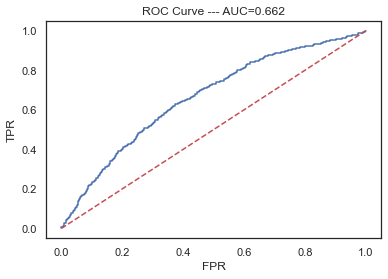

In [30]:
fpr, tpr, umbrales=roc(y_test, y_prob)
a=auc(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r--')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve --- AUC={:.3f}'.format(a))
plt.show();

This plot is telling us that our model is a bit better than a random classifier, but is not a very good model in deed. Let's take a look to the confusion matrix.

**Confusion Matrix**

A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand. But this matrix can give us a few insights about how the model is mistaken.

In [31]:
cm(y_test, y_pred)    # confusion matrix in brute numbers

array([[1729,   48],
       [ 681,   42]])

In [32]:
conf_matrix_rate=cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred)))    # confusion matrix as a rate

conf_matrix_rate

array([[0.6916, 0.0192],
       [0.2724, 0.0168]])

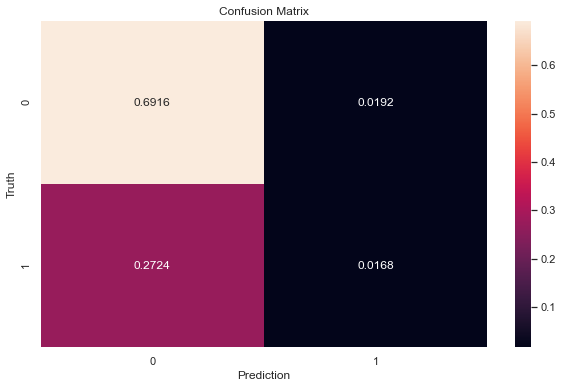

In [33]:
# plotting confusion matrix

fig, ax=plt.subplots(figsize=(10,6))

ax=sns.heatmap(conf_matrix_rate, 
               annot=True, 
               fmt='.4f',
               ax=ax)

plt.title('Confusion Matrix')
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show();

Now we are seeing how the model is classifying. Basically, the model is saying `No churn` to everything. So our model is a very poor clasiffier.

## Debate

**Can we make something about it?**

**Can we improve the model performance?**

**Do you remember the churn column distribution?**

**Is this confusion matrix a clue for you?**

**What do we do?**